In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [319]:
# Suppress warnings
import warnings
warnings.simplefilter(action='ignore')

In [320]:
# read data file
df = pd.read_csv('telecom_churn_data.csv')

In [321]:
# look at few data rows
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [322]:
# checking the size of rows and columns
df.shape

(99999, 226)

In [323]:
# get the column datatypes
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

## Data Cleaning

In [324]:
# finding null values in dataframe
df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [325]:
# function to sort missing percentages
def sortMissing(data, size):
    missing_df = round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False)
    print(missing_df.head(size))

In [326]:
# get the percentage of missing values
sortMissing(df, 50)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [327]:
# dropping all columns having high percentages of missing values >70%
for column in df:
    col = df[column]
    if col.isnull().sum() * 100 / len(df) > 70.0:
        df.drop([column], axis=1, inplace=True)

In [328]:
# 40 columns having 70% of missing values have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(8)
memory usage: 141.9+ MB


In [329]:
# check the remaining higheset missing value columns
sortMissing(df, 10)

loc_ic_t2m_mou_9    7.75
std_og_t2t_mou_9    7.75
std_ic_t2f_mou_9    7.75
std_ic_t2t_mou_9    7.75
roam_og_mou_9       7.75
loc_ic_mou_9        7.75
loc_og_t2t_mou_9    7.75
loc_ic_t2f_mou_9    7.75
roam_ic_mou_9       7.75
ic_others_9         7.75
dtype: float64


### Dropping columns having single value

In [330]:
# finding columns having a single value which doesn't give us any information gain
df.columns[df.nunique() <= 1].shape

(16,)

In [331]:
# drop single value columns total 16
for column in df.columns[df.nunique() <= 1]:
    df.drop([column], axis=1, inplace=True)

In [332]:
# left with 170 columns after data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 170 entries, mobile_number to sep_vbc_3g
dtypes: float64(132), int64(34), object(4)
memory usage: 129.7+ MB


## Filter High Value Customers

In [333]:
# calculate avg recharge amount by adding 6th and 7th month columns
avg_rech_amt = (df.total_rech_amt_6 + df.total_rech_amt_7) / 2
df['avg_rech_amt'] = avg_rech_amt

In [334]:
# finding 70th percentile of avg recharge amount
df['avg_rech_amt'].quantile(0.7)

368.5

In [335]:
# filtering high value customers having >=70 percentile
df_high_val = df[df['avg_rech_amt'] >= df['avg_rech_amt'].quantile(0.7)]
df_high_val.reset_index(inplace=True, drop=True)

In [336]:
# checking the shape of high value customers
df_high_val.shape

(30011, 171)

In [337]:
# sneek peak of high value customer column
df_high_val.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
0,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
1,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
2,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
3,7000875565,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
4,7000187447,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


## Derive and Tag Churn

In [338]:
# looking at the 9 month columns
df_high_val.filter(regex=("._9")).columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'vol_2g_mb_9',
       'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9'],
      dtype='object')

In [339]:
# tag chrun based on total_og_mou_9, total_ic_mou_9, monthly_2g_9, monthly_3g_9
df_high_val['churn'] = ((df_high_val['total_og_mou_9'] < 1.0) &  (df_high_val['total_ic_mou_9'] < 1.0) & (df_high_val['monthly_2g_9'] < 1.0) & (df_high_val['monthly_3g_9'] < 1.0)).astype(int)
df_high_val['churn'].value_counts()

0    27302
1     2709
Name: churn, dtype: int64

In [340]:
# checking the newly derived chrun column
df_high_val.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt,churn
0,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
1,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
2,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
3,7000875565,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
4,7000187447,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0


### Drop all columns for Month 9

In [341]:
# filtering columns which startes with _9
df_high_val.drop(df_high_val.filter(regex=("._9")).columns, inplace=True, axis=1)

In [342]:
# checking the shape after dropping 9 month column
df_high_val.shape

(30011, 131)

In [343]:
# removing mobile number, 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8' since they don't contribute information
df_high_val.drop(['mobile_number', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], inplace=True, axis=1)

## Feature Engineering

Feature 1 -> total number of calls
(Deriving total number of calls columns from No of inc calls+ no of outgoing calls for months 6,7 and 8)

In [344]:
# creating total_calls_mou total incoming minute of usage for 6,7 and 8 months
df_high_val['total_calls_mou'] = df_high_val['total_ic_mou_6'] + df_high_val['total_ic_mou_7'] + df_high_val['total_ic_mou_8'] + df_high_val['total_og_mou_6'] + df_high_val['total_og_mou_7'] + df_high_val['total_og_mou_8']
df_high_val['total_calls_mou']

0        3060.17
1        1260.47
2        4400.48
3        1907.08
4        1344.53
          ...   
30006    1984.50
30007    1455.93
30008    6027.03
30009    3685.82
30010      14.19
Name: total_calls_mou, Length: 30011, dtype: float64

Feature 2 -> total data consumption

In [345]:
# add up 2g and 3g data consumption for months 6,7 and 8
df_high_val['total_data_vol'] = df_high_val['vol_2g_mb_6'] + df_high_val['vol_2g_mb_7'] + df_high_val['vol_2g_mb_8'] + df_high_val['vol_3g_mb_6'] + df_high_val['vol_3g_mb_7'] + df_high_val['vol_3g_mb_8']
df_high_val['total_data_vol']

0           0.00
1        1118.92
2           0.02
3           0.00
4           0.00
          ...   
30006       0.00
30007       0.00
30008    2849.29
30009     693.09
30010    5973.76
Name: total_data_vol, Length: 30011, dtype: float64

In [346]:
# drop unused columns after extracting new features
df_high_val.drop(['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8'], inplace=True, axis=1)

In [347]:
df_high_val.shape

(30011, 117)

## Imputing Data using KNN Imputer

In [348]:
# let's check the missing value percentages
sortMissing(df_high_val, 50)

loc_og_mou_8        3.13
loc_og_t2m_mou_8    3.13
isd_og_mou_8        3.13
loc_og_t2c_mou_8    3.13
ic_others_8         3.13
spl_og_mou_8        3.13
isd_ic_mou_8        3.13
spl_ic_mou_8        3.13
std_ic_mou_8        3.13
og_others_8         3.13
std_ic_t2f_mou_8    3.13
std_ic_t2m_mou_8    3.13
std_ic_t2t_mou_8    3.13
loc_ic_t2t_mou_8    3.13
loc_ic_mou_8        3.13
loc_ic_t2f_mou_8    3.13
std_og_t2t_mou_8    3.13
loc_og_t2f_mou_8    3.13
loc_ic_t2m_mou_8    3.13
loc_og_t2t_mou_8    3.13
offnet_mou_8        3.13
std_og_t2m_mou_8    3.13
std_og_mou_8        3.13
std_og_t2f_mou_8    3.13
roam_og_mou_8       3.13
roam_ic_mou_8       3.13
onnet_mou_8         3.13
loc_og_t2m_mou_6    1.05
offnet_mou_6        1.05
std_ic_mou_6        1.05
loc_ic_t2t_mou_6    1.05
std_ic_t2f_mou_6    1.05
std_ic_t2t_mou_6    1.05
std_ic_t2m_mou_6    1.05
std_og_t2m_mou_6    1.05
onnet_mou_6         1.05
loc_ic_t2m_mou_6    1.05
loc_ic_mou_6        1.05
std_og_t2f_mou_6    1.05
loc_ic_t2f_mou_6    1.05


In [349]:
# Imputing missing values with KNN imputer
imputer = KNNImputer(n_neighbors=2)

In [350]:
# create new imputed dataframe
df_high_val_imputed = pd.DataFrame(imputer.fit_transform(df_high_val),columns = df_high_val.columns)

In [351]:
df_high_val_imputed.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt,churn,total_calls_mou,total_data_vol
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.0,802.0,57.74,19.38,18.74,0.0,1185.0,1.0,3060.17,0.00
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0.0,315.0,21.03,910.65,122.16,0.0,519.0,0.0,1260.47,1118.92
2,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0.0,2607.0,0.00,0.00,0.00,0.0,380.0,0.0,4400.48,0.02
3,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0.0,511.0,0.00,2.45,21.89,0.0,459.0,0.0,1907.08,0.00
4,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0.0,667.0,0.00,0.00,0.00,0.0,408.0,0.0,1344.53,0.00


In [352]:
# let's again sort the missing values
sortMissing(df_high_val_imputed, 10)

total_data_vol      0.0
isd_og_mou_6        0.0
std_og_t2t_mou_6    0.0
std_og_t2t_mou_7    0.0
std_og_t2t_mou_8    0.0
std_og_t2m_mou_6    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_8    0.0
std_og_t2f_mou_6    0.0
std_og_t2f_mou_7    0.0
dtype: float64


No missing values remains and now we're ready for Data preperation and Modelling

## Data Preparation

### Finding outliers in data

In [353]:
# Finding outliers .25,.5,.75,.90,.95,.99
df_high_val_imputed.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt,churn,total_calls_mou,total_data_vol
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.601975,304.708648,268.658461,418.929329,424.609016,376.90974,17.778822,...,0.140415,1264.064776,129.439626,135.127102,121.360548,6.562685,696.664356,0.090267,2937.411031,1032.590025
std,442.722413,462.897814,492.259586,460.632792,481.673965,466.192031,469.985511,486.065707,476.43774,80.206492,...,0.974727,975.263117,390.478591,408.024394,389.726031,48.638658,488.782088,0.286569,2100.949619,2462.703013
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,368.500000,0.000000,0.000000,0.000000
25%,364.161000,365.004500,289.609500,41.880000,41.385000,28.785000,138.550000,136.260000,98.68500,0.000000,...,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1600.245000,0.000000
50%,495.682000,493.561000,452.091000,126.190000,125.730000,100.510000,282.740000,282.190000,241.58000,0.000000,...,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,568.500000,0.000000,2476.670000,0.000000
75%,703.922000,700.788000,671.150000,353.500000,359.950000,298.695000,523.395000,532.800000,483.17000,0.000000,...,0.000000,1924.000000,1.600000,1.990000,0.000000,0.000000,795.500000,0.000000,3741.055000,1142.155000
90%,994.099000,995.557000,985.202000,795.340000,824.660000,724.130000,916.080000,935.690000,854.39000,33.560000,...,0.000000,2846.000000,438.970000,454.830000,394.500000,0.000000,1118.000000,0.000000,5476.420000,3318.840000
95%,1240.793500,1261.421500,1258.555500,1154.405000,1208.620000,1115.660000,1271.470000,1286.285000,1188.57500,96.675000,...,1.000000,3179.000000,818.750000,845.315000,761.740000,18.635000,1406.000000,1.000000,6835.855000,4942.215000
99%,1983.089500,1999.374500,1987.934400,2166.370000,2220.367000,2188.504000,2326.290000,2410.104000,2211.64200,351.011000,...,3.000000,3651.000000,1822.115000,1941.598000,1866.386000,173.662000,2216.300000,1.000000,10416.712000,10225.851000


In [354]:
# List of columns with outliers
out_list = []
for col in df_high_val_imputed:
    IQR = df_high_val_imputed[col].quantile(0.75) - df_high_val_imputed[col].quantile(0.5)
    if df_high_val_imputed[col].max()  >  df_high_val_imputed[col].quantile(0.75) + 1.5*IQR:
        out_list.append(col)
out_list

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'lo

## Modelling

In [355]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df_high_val_imputed.drop(['churn'],axis=1)

# Putting response variable to y
y = df_high_val_imputed['churn']

### Feature Standardization

In [356]:
# normalize data
normalized_X = (X-X.mean())/X.std()

In [357]:
# checking data is normalized across all columns
normalized_X

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt,total_calls_mou,total_data_vol
0,1.088482,1.643375,5.356163,-0.518335,-0.519083,-0.464119,0.073408,0.293275,-0.107044,-0.019310,...,-0.154971,-0.144056,-0.473785,-0.183620,-0.283677,-0.263315,-0.134927,0.999087,0.058430,-0.419291
1,-0.471093,-0.209360,-0.807492,0.254190,0.096167,-0.501035,-0.689956,-0.707680,-0.504640,-0.221663,...,-0.154971,-0.144056,-0.973137,-0.277633,1.900678,0.002051,-0.134927,-0.363484,-0.798182,0.035055
2,-0.213313,-0.828400,0.118642,0.445383,-0.407576,0.569683,-0.011956,-0.628164,0.221541,0.071705,...,-0.154971,-0.144056,1.376998,-0.331490,-0.331174,-0.311400,-0.134927,-0.647864,0.696385,-0.419283
3,-0.353064,-0.624903,-0.704838,-0.534248,-0.478952,-0.424822,-0.260943,-0.400911,-0.449481,-0.221663,...,-0.154971,-0.144056,-0.772166,-0.331490,-0.325170,-0.255232,-0.134927,-0.486238,-0.490412,-0.419291
4,0.232027,-1.231709,-1.034735,1.930622,-0.613337,-0.559573,-0.760213,-0.873563,-0.779472,-0.221663,...,-0.154971,-0.144056,-0.612209,-0.331490,-0.331174,-0.311400,-0.134927,-0.590579,-0.758172,-0.419291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30006,-0.736388,-0.385661,-0.495687,-0.633025,-0.336573,-0.366906,-0.190111,0.155393,-0.044979,-0.158576,...,-0.154971,-0.144056,-0.248205,-0.331490,-0.331174,-0.311400,-0.134927,-0.623313,-0.453562,-0.419291
30007,-0.390722,-0.579053,-0.332835,-0.605780,-0.632604,-0.573494,0.020172,-0.118974,-0.034275,-0.221663,...,-0.154971,-0.144056,1.835336,-0.331490,-0.331174,-0.311400,-0.134927,-0.473962,-0.705148,-0.419291
30008,0.130304,-0.289281,0.059880,1.107451,0.507919,1.087002,0.778387,0.396080,0.458675,-0.221663,...,-0.154971,-0.144056,1.468255,0.942460,1.136067,1.238612,-0.134927,0.310641,1.470582,0.737685
30009,-0.620539,-0.164623,-0.269731,-0.209955,-0.270408,-0.571006,-0.517142,-0.303661,-0.269877,-0.221663,...,-0.154971,-0.144056,-0.959807,-0.063280,-0.331174,-0.311400,-0.134927,-0.469871,0.356224,-0.137857


In [358]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, stratify=y, train_size=0.7,test_size=0.3,random_state=100)

### Handle Class Imbalance using SMOTE

In [359]:
### Checking the Churn Rate
churn = (sum(df_high_val['churn'])/len(df_high_val['churn'].index))*100
churn

9.02669021358835

In [360]:
len(df_high_val['churn'] / len(df_high_val['churn']))

30011

In [361]:
# install imblearn library for conducting SMOTE technique
!pip install imblearn

In [362]:
# import SMOTE oversampling class
from imblearn.over_sampling import SMOTE

In [363]:
# create SMOTE instance and fit training data
smt = SMOTE(random_state=100)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

## Prediction Model 1 using PCA

In [364]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [365]:
# instantiate PCA with 90% variance to capture
pca = PCA(0.9, random_state=100)

In [366]:
# fit transform X_train_SMOTE
df_train_pca = pca.fit_transform(X_train_SMOTE)

In [367]:
# checking shape
df_train_pca.shape

(38222, 48)

In [368]:
# checking pca components
pca.components_

array([[ 0.18111918,  0.23920536,  0.23001282, ...,  0.23210486,
         0.23907765,  0.0430761 ],
       [ 0.06859086,  0.06696192,  0.01205081, ...,  0.07376213,
         0.09335071, -0.06935737],
       [ 0.09265153,  0.09021598,  0.08033333, ...,  0.10664626,
        -0.1541523 ,  0.05737978],
       ...,
       [ 0.11302563, -0.05464613, -0.04889958, ...,  0.03177761,
         0.00076612, -0.01431479],
       [ 0.02258835, -0.03099895, -0.05518772, ..., -0.01627208,
        -0.00281472, -0.01908585],
       [-0.07060337,  0.11497991,  0.0529087 , ...,  0.03159167,
        -0.01575299, -0.00874922]])

In [369]:
# checking variance ration for components
pca.explained_variance_ratio_

array([0.09307098, 0.0820457 , 0.06615656, 0.04502625, 0.04432145,
       0.042437  , 0.04153815, 0.03182991, 0.03044105, 0.02687652,
       0.02298233, 0.02220129, 0.01950086, 0.01921703, 0.01815837,
       0.01776553, 0.01580097, 0.01491554, 0.01443222, 0.0141749 ,
       0.01371095, 0.01296315, 0.0128225 , 0.01220562, 0.01124796,
       0.01066133, 0.00966258, 0.00930325, 0.00877872, 0.0086052 ,
       0.00834652, 0.00793868, 0.00766625, 0.00738148, 0.00728001,
       0.00721287, 0.00675975, 0.00653719, 0.00632641, 0.00617078,
       0.00603234, 0.0054191 , 0.00502362, 0.00493926, 0.00467391,
       0.00440714, 0.00414379, 0.00407812])

In [370]:
# finding commulative variance ratio for plotting
var_cumu = np.cumsum(pca.explained_variance_ratio_)

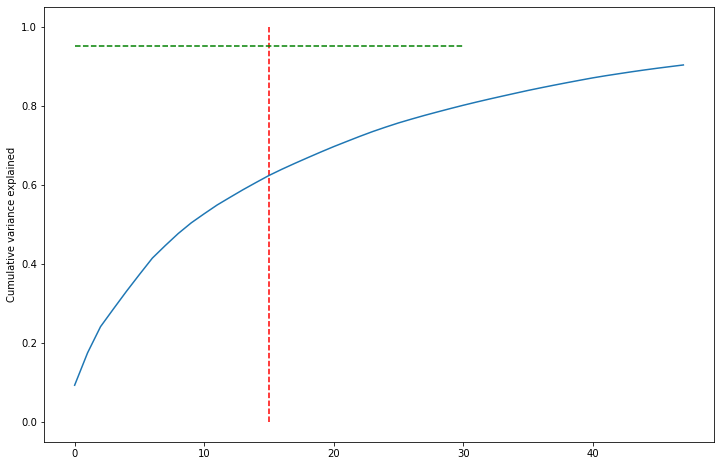

In [371]:
# Scree plot
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [372]:
# create correlation matrix
corrmat = np.corrcoef(df_train_pca.transpose())

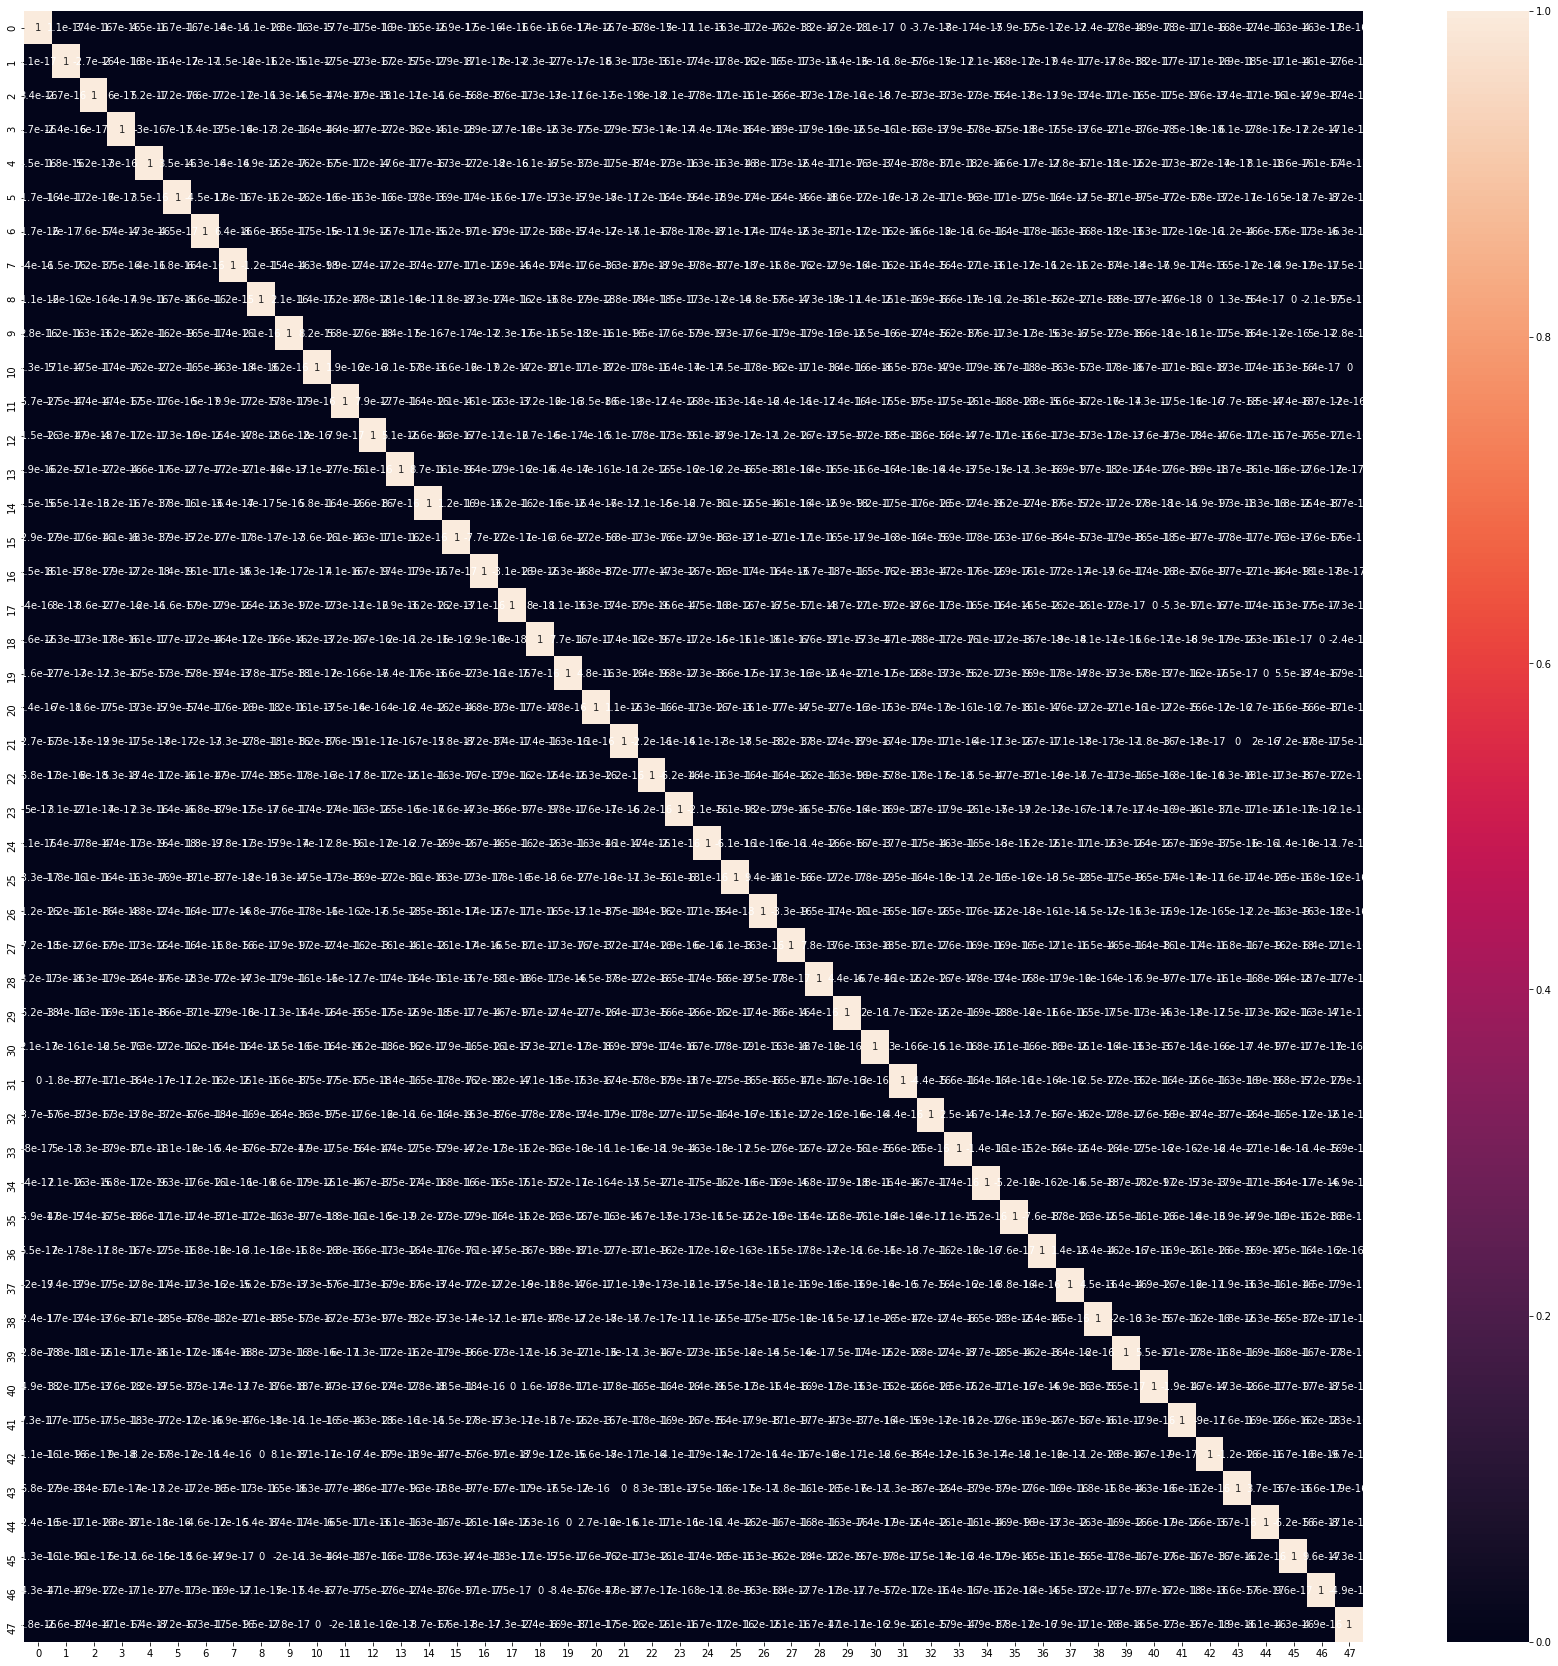

In [373]:
# Plotting heatmap
plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True);

In [374]:
# Applying the transformation on the test set
df_test_pca = pca.transform(X_test)
df_test_pca.shape

(9004, 48)

#### Applying logistic Regression on PCA Data

In [375]:
# Instantiate Logistic Regression
learner_pca = LogisticRegression()

In [376]:
# fit training data
model_pca = learner_pca.fit(df_train_pca, y_train_SMOTE)

**Making Predictions**

In [377]:
# find prediction probabilities on test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
y_pred_1 = pd.DataFrame(pred_probs_test)
y_pred_1.head()

,0
0,0.008734
1,0.282719
2,0.126948
3,0.281472
4,0.598486


In [378]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
23530,0.0
4825,0.0
14228,0.0
21259,0.0
23625,0.0


In [379]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,23530,0.0,0.008734
1,4825,0.0,0.282719
2,14228,0.0,0.126948
3,21259,0.0,0.281472
4,23625,0.0,0.598486


In [380]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,churn,Churn_Prob,predicted
0,23530,0.0,0.008734,0
1,4825,0.0,0.282719,0
2,14228,0.0,0.126948,0
3,21259,0.0,0.281472,0
4,23625,0.0,0.598486,1


### Model Evaluation for Logistic Regression using PCA

In [381]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6734, 1457],
       [ 144,  669]])

In [382]:
# accuracy score
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8221901377165705

In [383]:
# precision score
metrics.precision_score(y_pred_final.churn, y_pred_final.predicted)

0.3146754468485419

In [384]:
#recall score
metrics.recall_score(y_pred_final.churn, y_pred_final.predicted)

0.8228782287822878

In [385]:
# f1 score
metrics.f1_score(y_pred_final.churn, y_pred_final.predicted)

0.45525689009867304

In [386]:
#function to plot ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

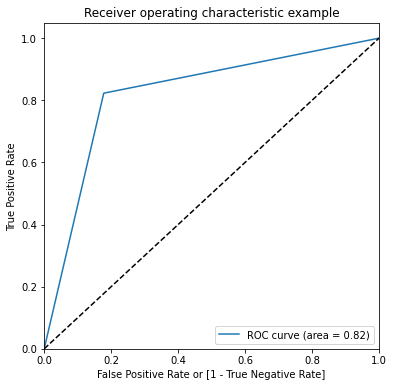

(array([0.        , 0.17787816, 1.        ]),
 array([0.        , 0.82287823, 1.        ]),
 array([2, 1, 0]))

In [387]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [388]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

### Conclusion: By applying PCA we got
- Accuracy: 82.2%
- Precision: 31.4%
- Recall: 82.2%
- f1 score: 45.5%

## Building Model 2 for Feature Selection using Logistic Regression

In [389]:
# Splitting the data into train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

In [390]:
import statsmodels.api as sm

In [391]:
# Logistic regression model using imputed data
logm1 = sm.GLM(y_train_SMOTE,(sm.add_constant(X_train_SMOTE)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38222
Model:                            GLM   Df Residuals:                    38106
Model Family:                Binomial   Df Model:                          115
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 22 Feb 2021   Deviance:                          nan
Time:                        14:28:59   Pearson chi2:                 4.62e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.0684      0.034    -60.920      0.000      -2.135      -2.002
arpu_6                -0.0864      0.073     -1.181      0.238      -0.230       0.057
arpu_7                 0.4150      0.089      4.689      0.000       0.242       0.588
arpu_8                 0.6835      0.101      6.792      0.000       0.486       0.881
onnet_mou_6           -2.0596      1.769     -1.164      0.244      -5.527       1.408
onnet_mou_7           -2.8838      1.379     -2.091      0.036      -5.586      -0.181
onnet_mou_8           -1.4411      1.492     -0.966      0.334      -4.364       1.482
offnet_mou_6          -2.1806      1.794     -1.216      0.224      -5.696       1.335
offnet_mou_7          -3.0617      1.345     -2.277      0.023      -5.697      -0.426
offnet_mou_8          -1.7591      1.492     -1.179      0.239      -4.684       1.166
roam_ic_mou_6          0.0988      0.024      4.062      0.000       0.051       0.147
roam_ic_mou_7          0.0139      0.030      0.463      0.643      -0.045       0.073
roam_ic_mou_8          0.0160      0.025      0.653      0.514      -0.032       0.064
roam_og_mou_6          0.5102      0.456      1.119      0.263      -0.383       1.404
roam_og_mou_7          0.7826      0.276      2.838      0.005       0.242       1.323
roam_og_mou_8          0.4183      0.338      1.239      0.215      -0.243       1.080
loc_og_t2t_mou_6    1210.7920    716.046      1.691      0.091    -192.633    2614.217
loc_og_t2t_mou_7    2219.9004    747.799      2.969      0.003     754.240    3685.560
loc_og_t2t_mou_8    6278.7733    744.631      8.432      0.000    4819.324    7738.222
loc_og_t2m_mou_6    1277.8140    755.848      1.691      0.091    -203.621    2759.249
loc_og_t2m_mou_7    2152.6188    725.174      2.968      0.003     731.304    3573.933
loc_og_t2m_mou_8    6274.5299    744.073      8.433      0.000    4816.174    7732.885
loc_og_t2f_mou_6     115.9718     68.550      1.692      0.091     -18.383     250.327
loc_og_t2f_mou_7     201.9160     68.084      2.966      0.003      68.474     335.358
loc_og_t2f_mou_8     540.9885     64.156      8.432      0.000     415.245     666.732
loc_og_t2c_mou_6       0.0001      0.018      0.007      0.994      -0.035       0.035
loc_og_t2c_mou_7       0.0671      0.027      2.461      0.014       0.014       0.120
loc_og_t2c_mou_8       0.0498      0.026      1.887      0.059      -0.002       0.101
loc_og_mou_6       -1934.3828   1148.228     -1.685      0.092   -4184.869     316.103
loc_og_mou_7       -3352.9913   1132.169     -2.962      0.003   -5572.002   -1133.981
loc_og_mou_8       -9786.0290   1161.161     -8.428      0.000   -1.21e+04   -7510.196
std_og_t2t_mou_6    2166.8916   1463.367      1.481      0.139    -701.254    5035.037
std_og_t2t_mou_7   -2561.3253   1555.0

**Correlation Matrix**

<href>https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas</href>

In [392]:
# defining function to calcultate top correlated column pairs
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_high_val_imputed, 40))

Top Absolute Correlations
arpu_8            total_rech_amt_8    0.953725
isd_og_mou_7      isd_og_mou_8        0.941799
arpu_6            total_rech_amt_6    0.941256
arpu_7            total_rech_amt_7    0.937114
isd_og_mou_6      isd_og_mou_7        0.917121
                  isd_og_mou_8        0.916664
total_rech_amt_7  avg_rech_amt        0.892365
arpu_7            avg_rech_amt        0.890903
total_rech_amt_6  avg_rech_amt        0.882449
arpu_6            avg_rech_amt        0.868980
onnet_mou_8       std_og_t2t_mou_8    0.857208
onnet_mou_7       std_og_t2t_mou_7    0.853110
loc_ic_t2m_mou_8  loc_ic_mou_8        0.852714
loc_ic_t2m_mou_6  loc_ic_mou_6        0.851612
offnet_mou_7      std_og_t2m_mou_7    0.851166
onnet_mou_6       std_og_t2t_mou_6    0.851027
offnet_mou_8      std_og_t2m_mou_8    0.848710
std_ic_t2m_mou_8  std_ic_mou_8        0.845886
loc_ic_mou_7      loc_ic_mou_8        0.838016
loc_ic_t2m_mou_7  loc_ic_mou_7        0.834284
loc_og_mou_7      loc_og_mou_8    

In [393]:
# create a list of top correlated pais
top_corr = get_top_abs_correlations(df_high_val_imputed, 40)
top_cor_list = top_corr[top_corr>0.80].index.droplevel().tolist()

**Dropping highly correlated variables**

In [394]:
# drop from train and test data
X_test2 = X_test.drop(top_cor_list,1)
X_train2 = X_train_SMOTE.drop(top_cor_list,1)

**Checking the Correlation Matrix**

In [395]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(X_train2, 20))

Top Absolute Correlations
og_others_7       og_others_8         0.984088
loc_og_t2m_mou_6  loc_og_mou_6        0.807551
std_ic_t2t_mou_6  std_ic_t2t_mou_7    0.787898
loc_ic_t2m_mou_6  loc_ic_t2m_mou_7    0.780133
loc_og_t2m_mou_7  loc_og_mou_7        0.773335
loc_og_t2t_mou_7  loc_og_mou_7        0.764117
loc_og_mou_6      loc_og_mou_7        0.759467
loc_og_t2t_mou_6  loc_og_t2t_mou_7    0.751750
loc_ic_t2f_mou_7  loc_ic_t2f_mou_8    0.748473
isd_ic_mou_6      isd_ic_mou_7        0.740867
loc_og_t2t_mou_6  loc_og_mou_6        0.737383
loc_og_t2m_mou_6  loc_og_t2m_mou_7    0.736637
sachet_3g_6       sachet_3g_7         0.734416
loc_ic_t2t_mou_7  loc_ic_t2t_mou_8    0.729496
loc_ic_t2f_mou_6  loc_ic_t2f_mou_7    0.728697
onnet_mou_7       onnet_mou_8         0.724437
sachet_2g_6       sachet_2g_7         0.720708
std_og_t2f_mou_7  std_og_t2f_mou_8    0.719997
ic_others_7       ic_others_8         0.707473
isd_ic_mou_7      isd_ic_mou_8        0.703842
dtype: float64


**Re-Running the Model**

In [396]:
# create logm2 after dropping highly correlated column pairs
logm2 = sm.GLM(y_train_SMOTE,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38222
Model:                            GLM   Df Residuals:                    38128
Model Family:                Binomial   Df Model:                           93
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14078.
Date:                Mon, 22 Feb 2021   Deviance:                       28156.
Time:                        14:29:04   Pearson chi2:                 6.53e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1711      0.034    -64.212      0.000      -2.237      -2.105
arpu_6                -0.0742      0.045     -1.662      0.097      -0.162       0.013
arpu_7                 0.3305      0.038      8.696      0.000       0.256       0.405
arpu_8                 0.1167      0.059      1.971      0.049       0.001       0.233
onnet_mou_6           -6.4296      1.444     -4.453      0.000      -9.260      -3.600
onnet_mou_7           -0.3156      0.779     -0.405      0.685      -1.843       1.212
onnet_mou_8            3.5268      0.169     20.861      0.000       3.195       3.858
offnet_mou_6          -6.6147      1.472     -4.493      0.000      -9.500      -3.729
offnet_mou_7          -0.2275      0.785     -0.290      0.772      -1.766       1.311
offnet_mou_8           3.3725      0.173     19.511      0.000       3.034       3.711
roam_ic_mou_6          0.0953      0.023      4.127      0.000       0.050       0.141
roam_ic_mou_7          0.0252      0.030      0.848      0.397      -0.033       0.083
roam_ic_mou_8          0.0219      0.024      0.902      0.367      -0.026       0.070
roam_og_mou_6          1.6864      0.374      4.511      0.000       0.954       2.419
roam_og_mou_7          0.1939      0.159      1.223      0.221      -0.117       0.505
roam_og_mou_8         -0.6923      0.044    -15.904      0.000      -0.778      -0.607
loc_og_t2t_mou_6    3620.0343    676.379      5.352      0.000    2294.355    4945.714
loc_og_t2t_mou_7       3.1228      0.663      4.708      0.000       1.823       4.423
loc_og_t2m_mou_6    3821.0326    713.978      5.352      0.000    2421.661    5220.404
loc_og_t2m_mou_7       2.9128      0.645      4.515      0.000       1.648       4.177
loc_og_t2f_mou_6     346.6353     64.753      5.353      0.000     219.721     473.549
loc_og_t2f_mou_8       0.0375      0.054      0.698      0.485      -0.068       0.143
loc_og_t2c_mou_6       0.0070      0.018      0.397      0.691      -0.028       0.042
loc_og_t2c_mou_7       0.0368      0.026      1.404      0.160      -0.015       0.088
loc_og_t2c_mou_8       0.0544      0.026      2.091      0.037       0.003       0.105
loc_og_mou_6       -5795.6828   1084.628     -5.343      0.000   -7921.515   -3669.851
loc_og_mou_7          -0.7162      1.169     -0.613      0.540      -3.008       1.575
std_og_t2f_mou_6       0.1089      0.036      3.018      0.003       0.038       0.180
std_og_t2f_mou_7      -0.1909      0.047     -4.051      0.000      -0.283      -0.099
std_og_t2f_mou_8      -0.1784      0.060     -2.980      0.003      -0.296      -0.061
std_og_mou_6          14.5467      1.916      7.591      0.000      10.791      18.302
std_og_mou_7           6.8714      1.034      6.647      0.000       4.845       8.897
std_og_mou_8           0.5965      0.1

In above statistics we could see, we've high p-values features that needs to be taken care of. We decided to use RFE to find TOP 20 features.

### Using RFE

In [397]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)    # running RFE with 20 variables as output
rfe = rfe.fit(X_train_SMOTE, y_train_SMOTE)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False False  True False  True False False False False False
 False False False  True  True False False  True False False False False
 False False False  True False False  True False  True False  True  True
 False False False  True  True False False False False False False False
 False False False False False False False False False False False False
  True  True False False False False False False False False False False
  True  True False False False False False  True False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False  True False  True False]
[75 13 34 25  1 95  1 92  2 51 78 86 26 38 58  1  1 64 46  1 52 48 47 65
 93 84 68  1 31 11  1 12  1  7  1  1 56 57 49  1  1 14  3 22 27 69 23 53
 87 18 19 29 32 17 28  5 73 30 36 37  1  1 72 42 44 50 43 21  9 85 45 77
  1  1 76 97 35 20 10  1 16 80 81 96 94 41  8 39 33 59 82 40 60 71 61  1
 

In [398]:
# Variables selected by RFE 
col = X.columns[rfe.ranking_==1]
col

Index(['onnet_mou_7', 'offnet_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'std_og_mou_6', 'std_og_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'std_ic_mou_6', 'std_ic_mou_7', 'isd_ic_mou_7', 'last_day_rch_amt_8',
       'sep_vbc_3g', 'total_calls_mou'],
      dtype='object')

**Top 20 best features**: 'onnet_mou_7', 'offnet_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'std_og_mou_6', 'std_og_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'std_ic_mou_6', 'std_ic_mou_7', 'isd_ic_mou_7', 'last_day_rch_amt_8',
       'sep_vbc_3g', 'total_calls_mou'

In [399]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9, max_iter=1000)
logsk.fit(X_train_SMOTE[col], y_train_SMOTE)

LogisticRegression(C=1000000000.0, max_iter=1000)

In [400]:
logm1 = sm.GLM(y_train_SMOTE,(sm.add_constant(X_train_SMOTE[col])), family = sm.families.Binomial())
modres = logm1.fit()
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38222
Model:                            GLM   Df Residuals:                    38201
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16194.
Date:                Mon, 22 Feb 2021   Deviance:                       32388.
Time:                        14:32:06   Pearson chi2:                 1.49e+10
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7912      0.029    -61.622      0.000      -1.848      -1.734
onnet_mou_7            1.9307      0.141     13.651      0.000       1.654       2.208
offnet_mou_6           1.5905      0.101     15.724      0.000       1.392       1.789
loc_og_t2t_mou_6       0.9779      0.071     13.868      0.000       0.840       1.116
loc_og_t2t_mou_7       0.6878      0.090      7.684      0.000       0.512       0.863
loc_og_t2m_mou_7       1.5462      0.049     31.686      0.000       1.451       1.642
loc_og_mou_6           0.6388      0.098      6.522      0.000       0.447       0.831
std_og_t2t_mou_6       1.4069      0.094     14.944      0.000       1.222       1.591
std_og_t2t_mou_8       1.4522      0.050     29.255      0.000       1.355       1.549
std_og_t2m_mou_7       1.7940      0.133     13.507      0.000       1.534       2.054
std_og_t2m_mou_8       1.2795      0.055     23.162      0.000       1.171       1.388
std_og_mou_6           1.2258      0.138      8.868      0.000       0.955       1.497
std_og_mou_7           1.2782      0.197      6.486      0.000       0.892       1.664
loc_ic_mou_6           1.7857      0.050     35.806      0.000       1.688       1.883
loc_ic_mou_7           2.0562      0.061     33.813      0.000       1.937       2.175
std_ic_mou_6           0.9597      0.032     29.648      0.000       0.896       1.023
std_ic_mou_7           0.8242      0.038     21.710      0.000       0.750       0.899
isd_ic_mou_7           0.9589      0.027     35.022      0.000       0.905       1.013
last_day_rch_amt_8    -0.6501      0.026    -25.271      0.000      -0.701      -0.600
sep_vbc_3g            -1.5315      0.118    -12.961      0.000      -1.763      -1.300
total_calls_mou      -10.7696      0.179    -60.298      0.000     -11.120     -10.420
======================================================================================
"""

In [401]:
# predict test data
res = modres.predict(sm.add_constant(X_test[col]))
res

23530    0.000967
4825     0.412637
14228    0.235883
21259    0.196831
23625    0.547184
           ...   
9124     0.014878
13489    0.668802
23892    0.320627
6549     0.000868
19558    0.000021
Length: 9004, dtype: float64

**Making Predictions**

In [402]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.000967
1,0.412655
2,0.235916
3,0.196828
4,0.547174


In [403]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
23530,0.0
4825,0.0
14228,0.0
21259,0.0
23625,0.0


In [404]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,23530,0.0,0.000967
1,4825,0.0,0.412655
2,14228,0.0,0.235916
3,21259,0.0,0.196828
4,23625,0.0,0.547174


In [405]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,churn,Churn_Prob,predicted
0,23530,0.0,0.000967,0
1,4825,0.0,0.412655,0
2,14228,0.0,0.235916,0
3,21259,0.0,0.196828,0
4,23625,0.0,0.547174,1


**Model Evaluation**

In [406]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6602, 1589],
       [ 134,  679]])

In [407]:
# model accuracy score
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8086406041759218

In [408]:
# model precision score
metrics.precision_score(y_pred_final.churn, y_pred_final.predicted)

0.2993827160493827

In [409]:
# model recall score
metrics.recall_score(y_pred_final.churn, y_pred_final.predicted)

0.8351783517835178

In [410]:
# model f1 score
metrics.f1_score(y_pred_final.churn, y_pred_final.predicted)

0.4407659850697825

### Conclusion: By choosing TOP 20 features using RFE base Logistic Regression model has
- Accuracy: 80.8%
- Precision: 29.9%
- Recall: 83.5%
- f1 score: 44.0%

### Hyperparameter Tuning of Log Regression Base Model using VIF

In [411]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [412]:
vif = pd.DataFrame()
vif['Features'] = X_train_SMOTE[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SMOTE[col].values, i) for i in range(X_train_SMOTE[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,std_og_mou_7,130.28
0,onnet_mou_7,67.64
8,std_og_t2m_mou_7,63.37
10,std_og_mou_6,47.47
19,total_calls_mou,32.03
6,std_og_t2t_mou_6,26.25
1,offnet_mou_6,24.69
5,loc_og_mou_6,16.77
3,loc_og_t2t_mou_7,16.35
2,loc_og_t2t_mou_6,8.91


In [413]:
# dropping highest VIF feature std_og_mou_7
col = col.drop('std_og_mou_7', 1)
col

Index(['onnet_mou_7', 'offnet_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'std_og_mou_6', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_mou_6',
       'std_ic_mou_7', 'isd_ic_mou_7', 'last_day_rch_amt_8', 'sep_vbc_3g',
       'total_calls_mou'],
      dtype='object')

In [414]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_SMOTE[col])
logm2 = sm.GLM(y_train_SMOTE,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38222
Model:                            GLM   Df Residuals:                    38202
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16214.
Date:                Mon, 22 Feb 2021   Deviance:                       32429.
Time:                        14:32:09   Pearson chi2:                 9.19e+09
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7737      0.029    -60.759      0.000      -1.831      -1.717
onnet_mou_7            2.8044      0.049     57.232      0.000       2.708       2.900
offnet_mou_6           1.3974      0.095     14.654      0.000       1.210       1.584
loc_og_t2t_mou_6       0.8689      0.068     12.836      0.000       0.736       1.002
loc_og_t2t_mou_7       0.1835      0.044      4.144      0.000       0.097       0.270
loc_og_t2m_mou_7       1.4939      0.048     31.304      0.000       1.400       1.587
loc_og_mou_6           0.7389      0.096      7.734      0.000       0.552       0.926
std_og_t2t_mou_6       1.2457      0.090     13.891      0.000       1.070       1.421
std_og_t2t_mou_8       1.3815      0.048     28.782      0.000       1.287       1.476
std_og_t2m_mou_7       2.6111      0.045     58.648      0.000       2.524       2.698
std_og_t2m_mou_8       1.2036      0.054     22.387      0.000       1.098       1.309
std_og_mou_6           1.3779      0.135     10.233      0.000       1.114       1.642
loc_ic_mou_6           1.7233      0.048     35.664      0.000       1.629       1.818
loc_ic_mou_7           1.9952      0.059     33.578      0.000       1.879       2.112
std_ic_mou_6           0.9264      0.032     29.222      0.000       0.864       0.988
std_ic_mou_7           0.8037      0.038     21.398      0.000       0.730       0.877
isd_ic_mou_7           0.9326      0.027     34.847      0.000       0.880       0.985
last_day_rch_amt_8    -0.6828      0.026    -25.956      0.000      -0.734      -0.631
sep_vbc_3g            -1.5951      0.126    -12.676      0.000      -1.842      -1.348
total_calls_mou      -10.4309      0.169    -61.706      0.000     -10.762     -10.100
======================================================================================
"""

In [415]:
# displaying VIF
vif = pd.DataFrame()
vif['Features'] = X_train_SMOTE[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SMOTE[col].values, i) for i in range(X_train_SMOTE[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,std_og_mou_6,43.89
18,total_calls_mou,30.21
6,std_og_t2t_mou_6,23.97
1,offnet_mou_6,21.58
5,loc_og_mou_6,15.79
2,loc_og_t2t_mou_6,8.31
0,onnet_mou_7,5.15
12,loc_ic_mou_7,5.12
8,std_og_t2m_mou_7,4.08
4,loc_og_t2m_mou_7,3.98


In [416]:
# dropping std_og_mou_6
col = col.drop('std_og_mou_6', 1)
col

Index(['onnet_mou_7', 'offnet_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_mou_6', 'std_ic_mou_7',
       'isd_ic_mou_7', 'last_day_rch_amt_8', 'sep_vbc_3g', 'total_calls_mou'],
      dtype='object')

In [417]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_SMOTE[col])
logm3 = sm.GLM(y_train_SMOTE,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38222
Model:                            GLM   Df Residuals:                    38203
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16263.
Date:                Mon, 22 Feb 2021   Deviance:                       32526.
Time:                        14:32:10   Pearson chi2:                 2.82e+09
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7306      0.029    -60.347      0.000      -1.787      -1.674
onnet_mou_7            2.6861      0.047     56.995      0.000       2.594       2.778
offnet_mou_6           2.3184      0.040     58.125      0.000       2.240       2.397
loc_og_t2t_mou_6       1.3302      0.052     25.554      0.000       1.228       1.432
loc_og_t2t_mou_7       0.1558      0.044      3.545      0.000       0.070       0.242
loc_og_t2m_mou_7       1.4032      0.046     30.340      0.000       1.313       1.494
loc_og_mou_6          -0.0850      0.052     -1.638      0.101      -0.187       0.017
std_og_t2t_mou_6       2.1015      0.037     56.381      0.000       2.028       2.175
std_og_t2t_mou_8       1.2778      0.046     27.598      0.000       1.187       1.369
std_og_t2m_mou_7       2.5596      0.044     58.347      0.000       2.474       2.646
std_og_t2m_mou_8       1.0646      0.052     20.600      0.000       0.963       1.166
loc_ic_mou_6           1.6715      0.048     35.082      0.000       1.578       1.765
loc_ic_mou_7           1.8725      0.057     32.776      0.000       1.761       1.984
std_ic_mou_6           0.9060      0.031     28.868      0.000       0.845       0.968
std_ic_mou_7           0.7307      0.036     20.059      0.000       0.659       0.802
isd_ic_mou_7           0.8893      0.026     34.372      0.000       0.839       0.940
last_day_rch_amt_8    -0.7087      0.026    -26.813      0.000      -0.760      -0.657
sep_vbc_3g            -1.6227      0.128    -12.685      0.000      -1.873      -1.372
total_calls_mou       -9.9354      0.159    -62.604      0.000     -10.246      -9.624
======================================================================================
"""

In [418]:
# displaying VIF
vif = pd.DataFrame()
vif['Features'] = X_train_SMOTE[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SMOTE[col].values, i) for i in range(X_train_SMOTE[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,total_calls_mou,28.70
5,loc_og_mou_6,6.80
2,loc_og_t2t_mou_6,5.43
11,loc_ic_mou_7,5.01
0,onnet_mou_7,4.97
8,std_og_t2m_mou_7,4.07
4,loc_og_t2m_mou_7,3.92
6,std_og_t2t_mou_6,3.84
10,loc_ic_mou_6,3.73
7,std_og_t2t_mou_8,3.62


In [419]:
# dropping total_calls_mou
col = col.drop('total_calls_mou', 1)
col

Index(['onnet_mou_7', 'offnet_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_mou_6', 'std_ic_mou_7',
       'isd_ic_mou_7', 'last_day_rch_amt_8', 'sep_vbc_3g'],
      dtype='object')

In [420]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_SMOTE[col])
logm4 = sm.GLM(y_train_SMOTE,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38222
Model:                            GLM   Df Residuals:                    38204
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19687.
Date:                Mon, 22 Feb 2021   Deviance:                       39374.
Time:                        14:32:12   Pearson chi2:                 6.52e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9681      0.021    -46.582      0.000      -1.009      -0.927
onnet_mou_7            0.8303      0.035     23.908      0.000       0.762       0.898
offnet_mou_6           0.3570      0.022     15.937      0.000       0.313       0.401
loc_og_t2t_mou_6       0.1496      0.038      3.940      0.000       0.075       0.224
loc_og_t2t_mou_7      -0.6893      0.037    -18.527      0.000      -0.762      -0.616
loc_og_t2m_mou_7      -0.5062      0.031    -16.390      0.000      -0.567      -0.446
loc_og_mou_6          -0.1600      0.041     -3.901      0.000      -0.240      -0.080
std_og_t2t_mou_6       0.1404      0.020      6.981      0.000       0.101       0.180
std_og_t2t_mou_8      -1.1458      0.034    -33.957      0.000      -1.212      -1.080
std_og_t2m_mou_7       0.5654      0.029     19.263      0.000       0.508       0.623
std_og_t2m_mou_8      -1.3987      0.038    -36.340      0.000      -1.474      -1.323
loc_ic_mou_6           0.0817      0.026      3.176      0.001       0.031       0.132
loc_ic_mou_7          -0.3225      0.031    -10.477      0.000      -0.383      -0.262
std_ic_mou_6           0.1266      0.021      6.098      0.000       0.086       0.167
std_ic_mou_7          -0.1666      0.023     -7.231      0.000      -0.212      -0.121
isd_ic_mou_7           0.0079      0.013      0.627      0.531      -0.017       0.033
last_day_rch_amt_8    -0.9450      0.026    -36.799      0.000      -0.995      -0.895
sep_vbc_3g            -1.5418      0.107    -14.400      0.000      -1.752      -1.332
======================================================================================
"""

In [421]:
# displaying VIF
vif = pd.DataFrame()
vif['Features'] = X_train_SMOTE[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SMOTE[col].values, i) for i in range(X_train_SMOTE[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_og_mou_6,6.79
2,loc_og_t2t_mou_6,5.17
0,onnet_mou_7,3.91
11,loc_ic_mou_7,3.18
3,loc_og_t2t_mou_7,3.16
10,loc_ic_mou_6,3.08
4,loc_og_t2m_mou_7,2.77
8,std_og_t2m_mou_7,2.70
6,std_og_t2t_mou_6,2.20
1,offnet_mou_6,2.14


In [422]:
# dropping loc_og_mou_6
col = col.drop('loc_og_mou_6', 1)
col

Index(['onnet_mou_7', 'offnet_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'std_ic_mou_6', 'std_ic_mou_7', 'isd_ic_mou_7', 'last_day_rch_amt_8',
       'sep_vbc_3g'],
      dtype='object')

In [423]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_SMOTE[col])
logm5 = sm.GLM(y_train_SMOTE,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38222
Model:                            GLM   Df Residuals:                    38205
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19694.
Date:                Mon, 22 Feb 2021   Deviance:                       39389.
Time:                        14:32:14   Pearson chi2:                 6.65e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9702      0.021    -46.653      0.000      -1.011      -0.929
onnet_mou_7            0.8332      0.035     23.973      0.000       0.765       0.901
offnet_mou_6           0.3158      0.019     16.289      0.000       0.278       0.354
loc_og_t2t_mou_6       0.0420      0.026      1.630      0.103      -0.009       0.093
loc_og_t2t_mou_7      -0.6850      0.037    -18.559      0.000      -0.757      -0.613
loc_og_t2m_mou_7      -0.5850      0.024    -24.569      0.000      -0.632      -0.538
std_og_t2t_mou_6       0.1413      0.020      7.028      0.000       0.102       0.181
std_og_t2t_mou_8      -1.1483      0.034    -33.996      0.000      -1.214      -1.082
std_og_t2m_mou_7       0.5937      0.029     20.804      0.000       0.538       0.650
std_og_t2m_mou_8      -1.3931      0.038    -36.261      0.000      -1.468      -1.318
loc_ic_mou_6           0.0521      0.024      2.152      0.031       0.005       0.100
loc_ic_mou_7          -0.2988      0.030    -10.045      0.000      -0.357      -0.241
std_ic_mou_6           0.1294      0.021      6.225      0.000       0.089       0.170
std_ic_mou_7          -0.1681      0.023     -7.270      0.000      -0.213      -0.123
isd_ic_mou_7           0.0076      0.013      0.603      0.547      -0.017       0.032
last_day_rch_amt_8    -0.9448      0.026    -36.793      0.000      -0.995      -0.894
sep_vbc_3g            -1.5423      0.107    -14.394      0.000      -1.752      -1.332
======================================================================================
"""

In [424]:
vif = pd.DataFrame()
vif['Features'] = X_train_SMOTE[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SMOTE[col].values, i) for i in range(X_train_SMOTE[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,onnet_mou_7,3.90
3,loc_og_t2t_mou_7,3.16
10,loc_ic_mou_7,3.05
9,loc_ic_mou_6,2.78
7,std_og_t2m_mou_7,2.48
2,loc_og_t2t_mou_6,2.41
5,std_og_t2t_mou_6,2.20
11,std_ic_mou_6,2.14
12,std_ic_mou_7,2.14
6,std_og_t2t_mou_8,2.09


All the features have < 5 VIF, now we could go ahead and do prediction on both train and test data

In [425]:
# find y_train_pred
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [426]:
# create column Churn_Prob from y_train_pred
y_train_pred_final['Churn_Prob'] = y_train_pred

In [427]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,Churn_Prob,predicted
0,0.0,0.078277,0
1,0.0,0.215337,0
2,0.0,0.498671,0
3,0.0,0.429578,0
4,0.0,0.001425,0


In [428]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted))

0.775757417194286


**Model Evaluation**

In [429]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted )
confusion

array([[14443,  4668],
       [ 3903, 15208]])

In [430]:
# model accuracy score
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted)

0.775757417194286

In [431]:
# model precision score
metrics.precision_score(y_train_pred_final.churn, y_train_pred_final.predicted)

0.7651438921312135

In [432]:
# model recall score
metrics.recall_score(y_train_pred_final.churn, y_train_pred_final.predicted)

0.7957720684422583

In [433]:
# model f1 score
metrics.f1_score(y_train_pred_final.churn, y_train_pred_final.predicted)

0.780157488393567

In [434]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

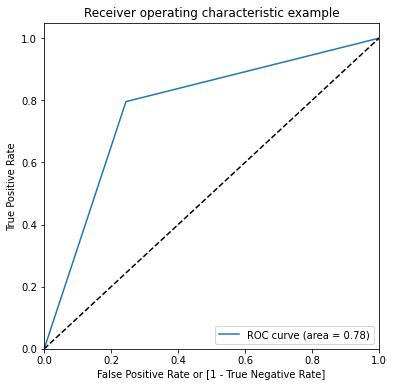

(array([0.        , 0.24425723, 1.        ]),
 array([0.        , 0.79577207, 1.        ]),
 array([2, 1, 0]))

In [435]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.predicted)

In [436]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.churn, y_train_pred_final.Churn_Prob))

'0.84'

### Conclusion: By applying hyperparatmeter tuning we got Training stats as below
- Accuracy: 77.5%
- Precision: 76.5%
- Recall: 79.5%
- f1 score: 78.0%
- AUC Score: 84%

### Making predictions on the test set

In [439]:
# adding intercept to X_test
X_test_sm = sm.add_constant(X_test[col])

In [440]:
# get y_test_predict
y_test_pred = res.predict(X_test_sm)

In [441]:
alues# print predicted v
y_test_pred[:10]

23530    0.001650
4825     0.611250
14228    0.569425
21259    0.077981
23625    0.448541
27334    0.211948
10302    0.171593
17481    0.723217
4224     0.345878
18622    0.076093
dtype: float64

In [442]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [443]:
# Let's see the head
y_pred_1.head()

,0
23530,0.001650
4825,0.611250
14228,0.569425
21259,0.077981
23625,0.448541


In [444]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [445]:
y_pred_final.head()

,churn,CustID,0
0,0.0,23530,0.001650
1,0.0,4825,0.611250
2,0.0,14228,0.569425
3,0.0,21259,0.077981
4,0.0,23625,0.448541


In [446]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [447]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)

In [448]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,23530,0.0,0.001650
1,4825,0.0,0.611250
2,14228,0.0,0.569425
3,21259,0.0,0.077981
4,23625,0.0,0.448541


In [449]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,CustID,churn,Churn_Prob,final_predicted
0,23530,0.0,0.001650,0
1,4825,0.0,0.611250,1
2,14228,0.0,0.569425,1
3,21259,0.0,0.077981,0
4,23625,0.0,0.448541,1


In [450]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.6705908485117725

In [451]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[5363, 2828],
       [ 138,  675]])

In [452]:
# model precision score
metrics.precision_score(y_pred_final.churn, y_pred_final.final_predicted)

0.1926919783043106

In [453]:
# model recall score
metrics.recall_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8302583025830258

In [454]:
# model f1 score
metrics.f1_score(y_pred_final.churn, y_pred_final.final_predicted)

0.31278962001853566

In [455]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

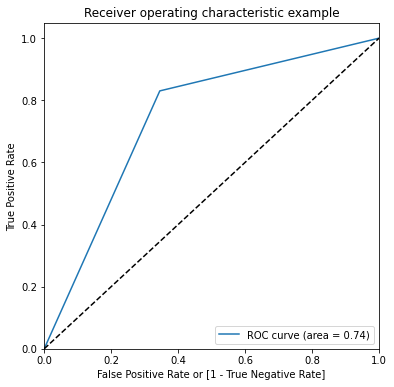

(array([0.        , 0.34525699, 1.        ]),
 array([0.       , 0.8302583, 1.       ]),
 array([2, 1, 0]))

In [456]:
draw_roc(y_pred_final.churn, y_pred_final.final_predicted)

In [457]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.Churn_Prob))

'0.83'

In [458]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [459]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8302583025830258

In [460]:
# Let us calculate specificity
TN / float(TN+FP)

0.6547430106214137

### Conclusion: By applying hyperparatmeter tuning we got Testing Prediction Metrics as below
- Accuracy: 67%
- Precision: 19.2%
- Recall: 83%
- f1 score: 31%
- AUC Score: 83%

### Important Predictor Variables

In [497]:
X_test[col].columns

Index(['onnet_mou_7', 'offnet_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'std_ic_mou_6', 'std_ic_mou_7', 'isd_ic_mou_7', 'last_day_rch_amt_8',
       'sep_vbc_3g'],
      dtype='object')

## Random Forest

Defaut Hyperparameters

In [462]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [463]:
# fit
rfc.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier()

In [464]:
# Making predictions
predictions = rfc.predict(X_test)

In [465]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [466]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7779  412]
 [ 271  542]]


In [467]:
print(accuracy_score(y_test,predictions))

0.9241448245224345


In [468]:
metrics.precision_score(y_test, predictions)

0.5681341719077568

In [469]:
metrics.recall_score(y_test, predictions)

0.6666666666666666

In [470]:
metrics.f1_score(y_test, predictions)

0.613469156762875

### Tuning max_depth

In [471]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_SMOTE, y_train_SMOTE)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [472]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.535561,0.048355,0.056255,0.010097,2,{'max_depth': 2},0.827600,0.844997,0.853087,0.843145,...,0.840328,0.009067,4,0.844099,0.839291,0.844888,0.849336,0.831873,0.841897,0.005940
1,10.303379,0.697265,0.115714,0.028915,7,{'max_depth': 7},0.877698,0.907129,0.905154,0.897828,...,0.897808,0.010554,3,0.916768,0.907152,0.906011,0.907679,0.907613,0.909045,0.003907
2,15.832777,0.718392,0.156926,0.017368,12,{'max_depth': 12},0.914585,0.947024,0.943354,0.936552,...,0.936921,0.011667,2,0.975766,0.970370,0.970338,0.972529,0.971777,0.972156,0.001991
3,19.393769,0.991163,0.187258,0.023492,17,{'max_depth': 17},0.927796,0.961282,0.957221,0.949895,...,0.950448,0.011899,1,0.992380,0.991072,0.991072,0.991726,0.991432,0.991536,0.000488


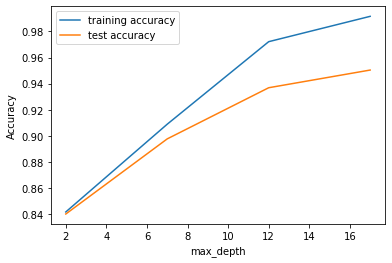

In [473]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning n_estimators

In [474]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_SMOTE, y_train_SMOTE)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [475]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.140789,1.576429,0.069259,0.012143,100,{'n_estimators': 100},0.857292,0.877567,0.879252,0.867347,...,0.871043,0.008001,4,0.880727,0.870164,0.872163,0.872621,0.870822,0.873299,0.003818
1,29.856998,1.211789,0.348624,0.118493,500,{'n_estimators': 500},0.855723,0.881230,0.880691,0.868394,...,0.872639,0.009625,1,0.880629,0.872420,0.872327,0.873471,0.873700,0.874509,0.003109
2,56.306236,2.453087,0.515429,0.050375,900,{'n_estimators': 900},0.856115,0.880183,0.876897,0.869440,...,0.872142,0.008793,2,0.881120,0.871766,0.871116,0.873864,0.872850,0.874143,0.003612
3,78.902863,5.482870,0.685627,0.039652,1300,{'n_estimators': 1300},0.856246,0.880314,0.878074,0.868917,...,0.871880,0.008700,3,0.881316,0.870851,0.871738,0.874877,0.872098,0.874176,0.003816


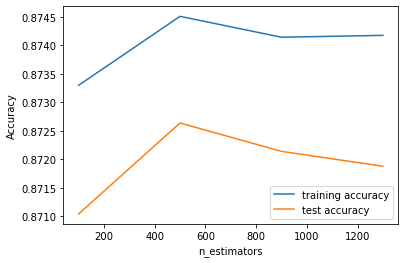

In [476]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

In [477]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [5, 10, 15, 20, 25]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_SMOTE, y_train_SMOTE)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [5, 10, 15, 20, 25]},
             return_train_score=True, scoring='accuracy')

In [478]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.075551,0.083812,0.057108,0.000787,5,{'max_features': 5},0.843035,0.866449,0.865777,0.857666,...,0.858302,0.008436,5,0.870720,0.858325,0.861600,0.861338,0.860717,0.862540,0.004250
1,5.543563,0.076110,0.057315,0.002514,10,{'max_features': 10},0.854545,0.877567,0.876504,0.872057,...,0.871566,0.008736,4,0.878961,0.869804,0.868991,0.875466,0.875041,0.873653,0.003740
2,8.109018,0.047799,0.059802,0.005469,15,{'max_features': 15},0.855723,0.881491,0.882522,0.871664,...,0.873869,0.009836,3,0.882755,0.872780,0.873308,0.875760,0.873700,0.875661,0.003688
3,10.749917,0.330204,0.055633,0.000635,20,{'max_features': 20},0.855723,0.884107,0.882391,0.872580,...,0.874732,0.010292,2,0.882951,0.874023,0.873700,0.876382,0.875139,0.876439,0.003389
4,13.161267,0.165979,0.056386,0.001341,25,{'max_features': 25},0.854938,0.884761,0.881868,0.873757,...,0.875412,0.010872,1,0.882951,0.874252,0.874910,0.877297,0.876807,0.877243,0.003071


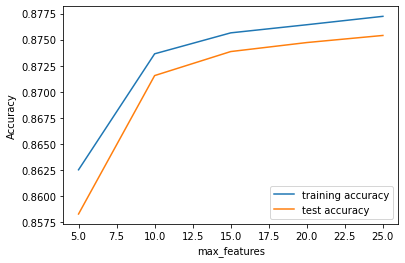

In [479]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning min_samples_leaf

In [480]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_SMOTE, y_train_SMOTE)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [481]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.328613,0.228627,0.111008,0.008653,100,{'min_samples_leaf': 100},0.870111,0.898365,0.895866,0.889325,...,0.889776,0.010270,1,0.902999,0.895673,0.892668,0.894336,0.893682,0.895872,0.003695
1,9.971366,0.038825,0.099887,0.005037,150,{'min_samples_leaf': 150},0.864225,0.890647,0.890895,0.883961,...,0.883732,0.010067,2,0.895313,0.885829,0.885702,0.888253,0.885800,0.888180,0.003694
2,9.475897,0.273326,0.093257,0.002660,200,{'min_samples_leaf': 200},0.862001,0.889209,0.887624,0.881083,...,0.881404,0.010086,3,0.890081,0.883605,0.882399,0.885179,0.882628,0.884778,0.002826
3,8.757667,0.161625,0.089606,0.003256,250,{'min_samples_leaf': 250},0.863048,0.885546,0.886185,0.878205,...,0.879389,0.008642,4,0.889296,0.879092,0.878311,0.881810,0.880306,0.881763,0.003948
4,8.380205,0.321763,0.078633,0.001339,300,{'min_samples_leaf': 300},0.861478,0.883976,0.884615,0.875196,...,0.877244,0.008558,5,0.885698,0.879158,0.877788,0.880633,0.878409,0.880337,0.002844


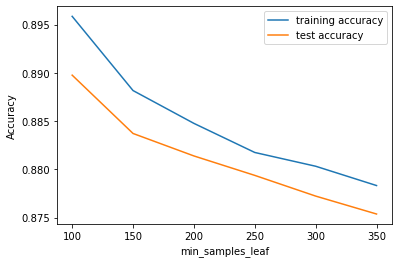

In [482]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [483]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_SMOTE, y_train_SMOTE)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [484]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,17.063019,0.219381,0.135051,0.003082,200,{'min_samples_split': 200},0.875997,0.911184,0.910387,0.905939,...,0.902334,0.013295,1,0.926252,0.912843,0.912748,0.914873,0.916443,0.916632,0.005002
1,16.336435,0.171193,0.127564,0.003660,250,{'min_samples_split': 250},0.875736,0.908829,0.904631,0.897043,...,0.897625,0.011595,2,0.919874,0.907839,0.906240,0.907384,0.907123,0.909692,0.005118
2,15.742204,0.253031,0.123695,0.008332,300,{'min_samples_split': 300},0.872727,0.903859,0.905154,0.896782,...,0.896107,0.012033,3,0.916113,0.902345,0.902577,0.904278,0.903035,0.905670,0.005264
3,15.488329,0.431568,0.120121,0.004821,350,{'min_samples_split': 350},0.872204,0.901373,0.900183,0.892072,...,0.892915,0.010844,4,0.913072,0.897668,0.899666,0.899438,0.899666,0.901902,0.005635
4,15.225655,0.456101,0.114784,0.002856,400,{'min_samples_split': 400},0.869326,0.898496,0.898875,0.891811,...,0.891136,0.011195,5,0.907545,0.894332,0.896494,0.896854,0.897704,0.898586,0.004615


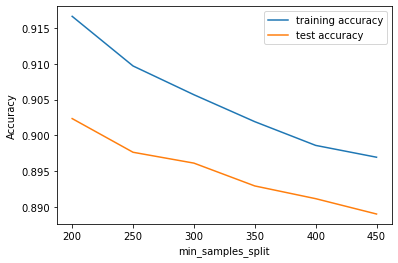

In [485]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Fitting the final model with the best parameters obtained from grid search.**

In [486]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=20,
                             n_estimators=500)

In [487]:
# fit
rfc.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(max_depth=15, max_features=20, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=500)

In [488]:
# predict
predictions = rfc.predict(X_test)

In [489]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [490]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      8191
         1.0       0.42      0.78      0.55       813

    accuracy                           0.88      9004
   macro avg       0.70      0.84      0.74      9004
weighted avg       0.93      0.88      0.90      9004



In [491]:
print(confusion_matrix(y_test,predictions))

[[7301  890]
 [ 175  638]]


In [492]:
rfc.feature_importances_

array([1.46988403e-03, 2.31406323e-03, 8.70258363e-02, 4.84890626e-04,
       6.77356265e-04, 4.84604983e-03, 4.93539401e-04, 6.67556110e-04,
       8.54854987e-03, 1.82709066e-03, 7.87383593e-03, 1.72781463e-01,
       1.46452157e-03, 1.00409779e-02, 1.79035327e-01, 5.52333291e-04,
       7.54183263e-04, 1.49786333e-02, 1.05493734e-03, 1.78191943e-03,
       2.26839849e-02, 2.91387622e-04, 5.22525734e-04, 2.03920216e-03,
       2.95693857e-04, 8.51870337e-04, 7.70126562e-04, 1.64390447e-03,
       3.33388609e-03, 3.77166735e-02, 9.12239361e-04, 1.61167460e-03,
       1.56515639e-03, 8.26610729e-04, 9.26392521e-04, 1.34419265e-03,
       5.67584741e-05, 7.81871724e-05, 1.19167109e-04, 1.14213630e-03,
       2.56118922e-03, 4.72631230e-03, 2.27124189e-04, 8.21441864e-04,
       9.34559270e-04, 2.82925979e-03, 4.84675392e-03, 4.84610539e-03,
       1.21742720e-03, 0.00000000e+00, 0.00000000e+00, 4.52428841e-04,
       3.97148224e-04, 1.03877963e-02, 1.00710764e-03, 9.64822694e-04,
      

### Important Predictor Variables

In [493]:
# find model's feature_importances_
important_features = pd.Series(data=rfc.feature_importances_,index=X_train_SMOTE.columns)
important_features.sort_values(ascending=False,inplace=True)

In [494]:
important_features[0:15]

roam_og_mou_8         0.179035
roam_ic_mou_8         0.172781
total_rech_amt_8      0.099253
arpu_8                0.087026
max_rech_amt_8        0.060485
loc_ic_mou_8          0.056827
last_day_rch_amt_8    0.055624
loc_og_mou_8          0.037717
loc_ic_t2m_mou_8      0.030951
loc_og_t2m_mou_8      0.022684
total_rech_num_8      0.021586
loc_og_t2t_mou_8      0.014979
loc_ic_t2t_mou_8      0.010388
roam_og_mou_7         0.010041
offnet_mou_8          0.008549
dtype: float64

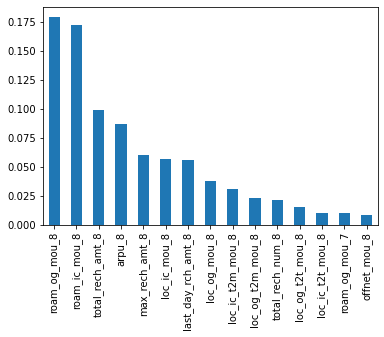

In [502]:
# Plotting important features in order of their importance
important_features[0:15].plot.bar();

## Conclusion:
- By using Random Forest we got the best Prediction score as compared to Logistic Regression and PCA technique.

- Roaming features in Month 8 contributes most of the variance since a customer is out of network area and not able to recharge.

- Also, total and maximum recharge in 8th month are important predictors of customer churn.

- By offering discounts to customers who are in month 8 and out of network area (roaming) could prevent them to switch to other operators.